# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [12]:
# Instalação de bibliotecas básicas
!pip install pandas
!pip install matplotlib
!pip install seaborn

!pip install dash plotly
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 50.2 MB/s eta 0:00:00


## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [13]:
# Responda aqui a primeira etapa

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from matplotlib.lines import Line2D



# Carregar o arquivo CSV
df = pd.read_csv('/content/sample_data/premier.csv')

print(df.head())
print(df['result'].value_counts())


   Unnamed: 0        date   time            comp        round  day venue  \
0           1  2021-08-15  16:30  Premier League  Matchweek 1  Sun  Away   
1           2  2021-08-21  15:00  Premier League  Matchweek 2  Sat  Home   
2           3  2021-08-28  12:30  Premier League  Matchweek 3  Sat  Home   
3           4  2021-09-11  15:00  Premier League  Matchweek 4  Sat  Away   
4           6  2021-09-18  15:00  Premier League  Matchweek 5  Sat  Home   

  result   gf   ga  ...  match report  notes    sh   sot  dist   fk   pk  \
0      L  0.0  1.0  ...  Match Report    NaN  18.0   4.0  16.9  1.0  0.0   
1      W  5.0  0.0  ...  Match Report    NaN  16.0   4.0  17.3  1.0  0.0   
2      W  5.0  0.0  ...  Match Report    NaN  25.0  10.0  14.3  0.0  0.0   
3      W  1.0  0.0  ...  Match Report    NaN  25.0   8.0  14.0  0.0  0.0   
4      D  0.0  0.0  ...  Match Report    NaN  16.0   1.0  15.7  1.0  0.0   

  pkatt season             team  
0   0.0   2022  Manchester City  
1   0.0   2022  Ma

In [14]:
# Contar o total de linhas e colunas
linhas, colunas = df.shape

# Exibir os resultados
print(f'Total de linhas: {linhas}')
print(f'Total de colunas: {colunas}')

Total de linhas: 1389
Total de colunas: 28


In [15]:
# Contar o total de posições nulas por coluna
nulos_por_coluna = df.isnull().sum()

# Contar o total de posições nulas no DataFrame
total_nulos = df.isnull().sum().sum()

# Exibir os resultados
print("Total de posições nulas por coluna:")
print(nulos_por_coluna)

print(f"\nTotal de posições nulas no DataFrame: {total_nulos}")

Total de posições nulas por coluna:
Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

Total de posições nulas no DataFrame: 2086


In [16]:
# Contar o número de partidas por dia da semana
dias_da_semana = df['day'].value_counts()

# Exibir o dia com mais e menos partidas
dia_mais_partidas = dias_da_semana.idxmax()
dia_menos_partidas = dias_da_semana.idxmin()

print(f"Dia da semana com mais partidas: {dia_mais_partidas} ({dias_da_semana.max()} partidas)")
print(f"Dia da semana com menos partidas: {dia_menos_partidas} ({dias_da_semana.min()} partidas)")

# Contar o número de partidas por time
partidas_por_time = df['team'].value_counts()

# Exibir o time com mais partidas
time_mais_partidas = partidas_por_time.idxmax()

print(f"Time com o maior número de partidas: {time_mais_partidas} ({partidas_por_time.max()} partidas)")

# Agrupar por time e somar os gols a favor (gf)
gols_a_favor = df.groupby('team')['gf'].sum()

# Exibir o time com maior e menor número de gols a favor
time_mais_gols = gols_a_favor.idxmax()
time_menos_gols = gols_a_favor.idxmin()

print(f"Time com mais gols a favor: {time_mais_gols} ({gols_a_favor.max()} gols)")
print(f"Time com menos gols a favor: {time_menos_gols} ({gols_a_favor.min()} gols)")

# Agrupar por time e somar os gols contra (ga)
gols_contra = df.groupby('team')['ga'].sum()

# Exibir o time com maior número de gols contra
time_mais_gols_contra = gols_contra.idxmax()

print(f"Time com mais gols contra: {time_mais_gols_contra} ({gols_contra.max()} gols)")

# Agrupar por time e somar os chutes no alvo (sot)
chutes_no_alvo = df.groupby('team')['sot'].sum()

# Exibir o time com maior e menor número de chutes no alvo
time_mais_sot = chutes_no_alvo.idxmax()
time_menos_sot = chutes_no_alvo.idxmin()

print(f"Time com mais chutes no alvo: {time_mais_sot} ({chutes_no_alvo.max()} chutes no alvo)")
print(f"Time com menos chutes no alvo: {time_menos_sot} ({chutes_no_alvo.min()} chutes no alvo)")


# Agrupar por time e calcular a distância média dos chutes (dist)
distancia_media = df.groupby('team')['dist'].mean()

# Exibir o time com maior distância média de chutes
time_maior_dist = distancia_media.idxmax()

print(f"Time com maior distância média de chutes: {time_maior_dist} ({distancia_media.max()} metros)")


# Calcular a diferença entre pênaltis tentados e convertidos para obter os erros
df['erros_pk'] = df['pkatt'] - df['pk']

# Agrupar por time e somar os erros de pênaltis
erros_por_time = df.groupby('team')['erros_pk'].sum()

# Exibir o time que erra menos e mais pênaltis
time_menos_erros = erros_por_time.idxmin()
time_mais_erros = erros_por_time.idxmax()

print(f"Time que erra menos pênaltis: {time_menos_erros} ({erros_por_time.min()} erros)")
print(f"Time que erra mais pênaltis: {time_mais_erros} ({erros_por_time.max()} erros)")

Dia da semana com mais partidas: Sat (551 partidas)
Dia da semana com menos partidas: Thu (50 partidas)
Time com o maior número de partidas: Southampton (72 partidas)
Time com mais gols a favor: Manchester City (163.0 gols)
Time com menos gols a favor: Sheffield United (20.0 gols)
Time com mais gols contra: Southampton (124.0 gols)
Time com mais chutes no alvo: Manchester City (420.0 chutes no alvo)
Time com menos chutes no alvo: Norwich City (92.0 chutes no alvo)
Time com maior distância média de chutes: Norwich City (18.003030303030304 metros)
Time que erra menos pênaltis: Brentford (0.0 erros)
Time que erra mais pênaltis: Brighton and Hove Albion (5.0 erros)


## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

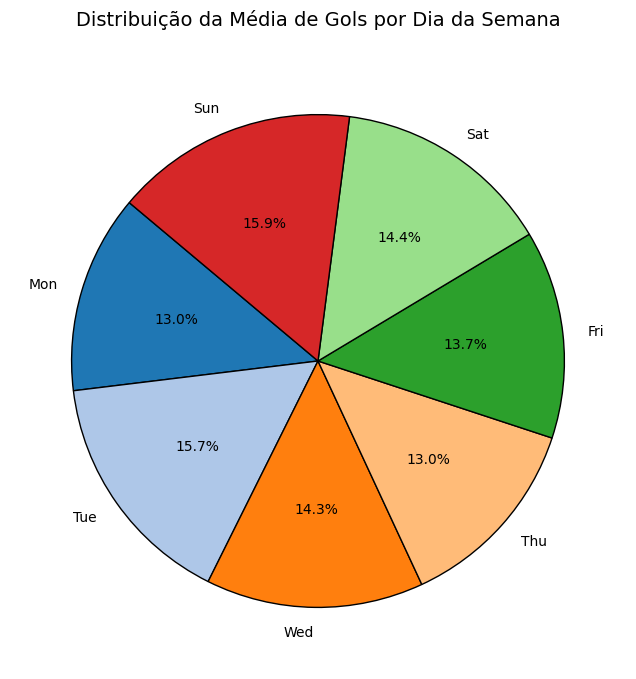

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que o DataFrame 'df' já esteja carregado e que as colunas 'gf' e 'ga' estejam presentes

# Criar uma nova coluna com a soma dos gols feitos no jogo (gols a favor + gols contra)
df['total_goals'] = df['gf'] + df['ga']

# Agrupar os dados por dia da semana, calculando a média de gols totais por jogo
avg_goals_per_day = df.groupby('day')['total_goals'].mean()

# Ordenar os dias da semana corretamente
ordered_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_goals_per_day = avg_goals_per_day.reindex(ordered_days)

# Plotar o gráfico de pizza
plt.figure(figsize=(10, 8))

# Criar o gráfico de pizza com cores distintas e um fundo claro
colors = plt.get_cmap('tab20').colors  # Usar um colormap com cores distintas
plt.pie(avg_goals_per_day, labels=avg_goals_per_day.index, autopct='%1.1f%%', colors=colors,
        startangle=140, wedgeprops={'edgecolor': 'black'})

# Adicionar título
plt.title('Distribuição da Média de Gols por Dia da Semana', fontsize=14, pad=20)

# Adicionar fundo claro
plt.gca().set_facecolor('lightgrey')

# Exibir o gráfico
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

<ipython-input-18-dc26426b2bcb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=capita_count, x='team', y='captain', palette='viridis')


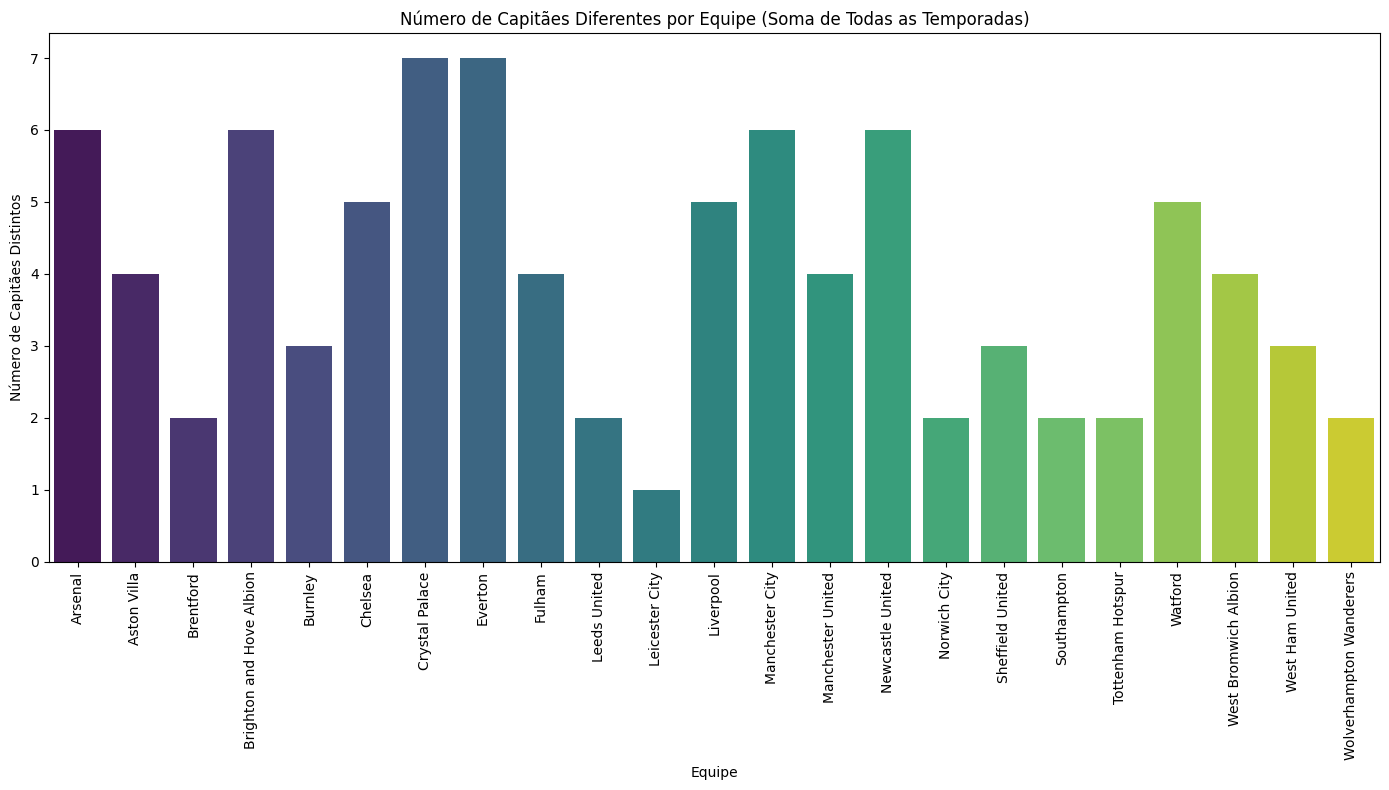

In [18]:
# Contar o número de capitães distintos por equipe, somando as temporadas
capita_count = df.groupby(['team'])['captain'].nunique().reset_index()

# Criar um gráfico de barras com as equipes e o número total de capitães
plt.figure(figsize=(14, 8))
sns.barplot(data=capita_count, x='team', y='captain', palette='viridis')
plt.xticks(rotation=90)
plt.title('Número de Capitães Diferentes por Equipe (Soma de Todas as Temporadas)')
plt.xlabel('Equipe')
plt.ylabel('Número de Capitães Distintos')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

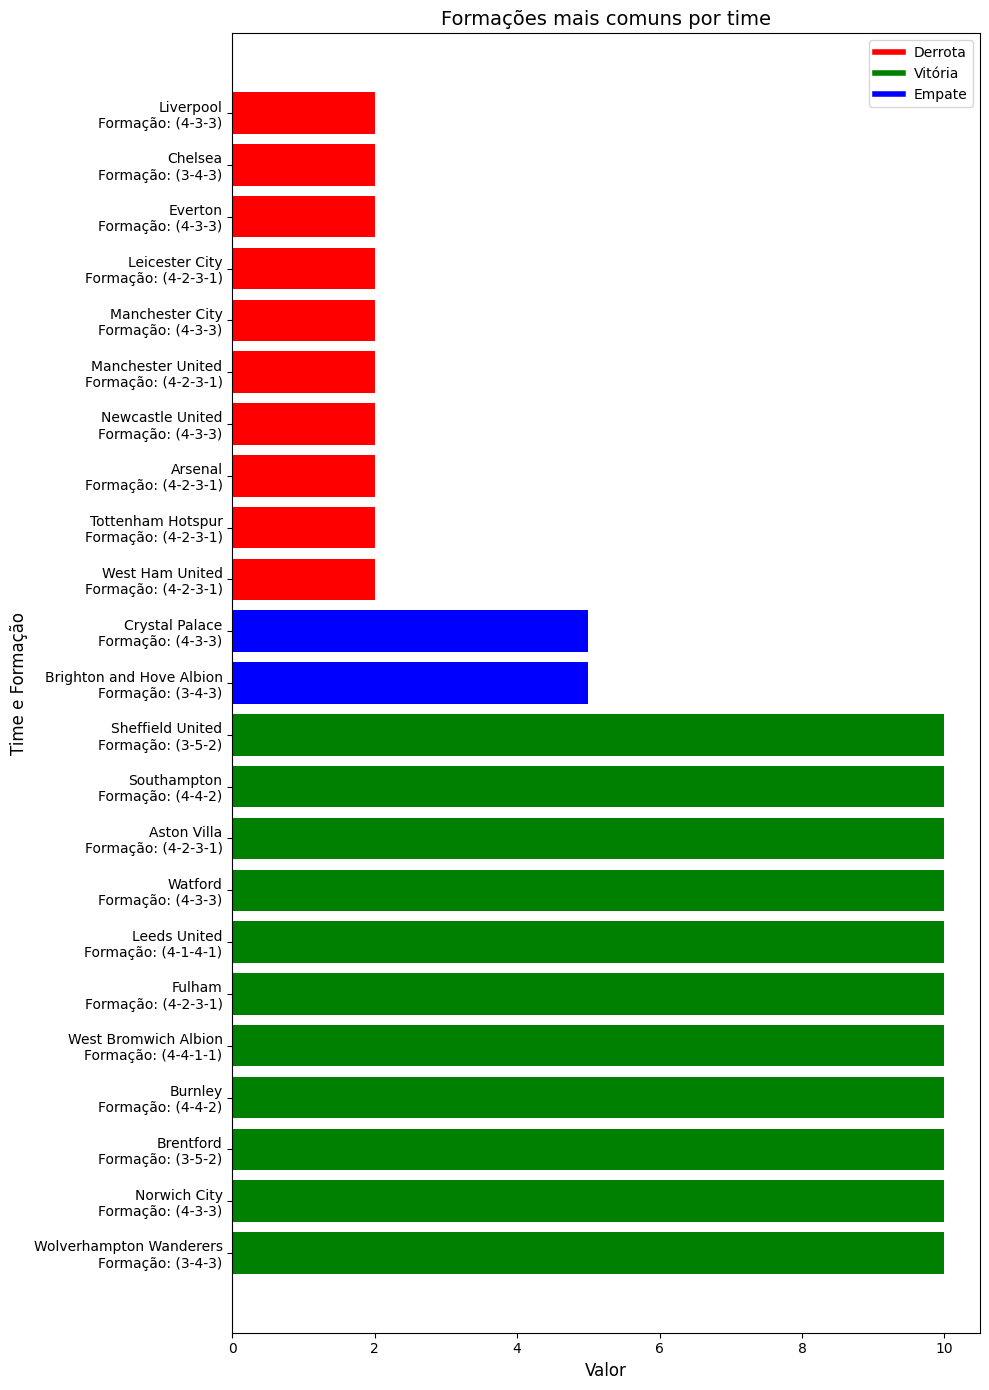

In [19]:

# Mapeamento dos resultados
mapeamento_result = {
    'L': 'Vitória',
    'W': 'Derrota',
    'D': 'Empate'
}
df['result'] = df['result'].replace(mapeamento_result)

# Agrupando por time, formação e resultado, e contando ocorrências
formacoes_resultados_comuns = df.groupby(['team', 'formation', 'result']).size().reset_index(name='counts')

# Selecionando as formações mais comuns por time
formacoes_resultados_mais_comuns = formacoes_resultados_comuns.loc[formacoes_resultados_comuns.groupby('team')['counts'].idxmax()]

# Preparando o DataFrame para o gráfico
df_formacoes_resultados_mais_comuns = formacoes_resultados_mais_comuns[['team', 'formation', 'result']]
df_formacoes_resultados_mais_comuns['value'] = df_formacoes_resultados_mais_comuns['result']

# Mapeando resultados para valores numéricos
mapeamento_result_2 = {
    'Vitória': 10,
    'Derrota': 2,
    'Empate': 5
}
df_formacoes_resultados_mais_comuns['value'] = df_formacoes_resultados_mais_comuns['value'].replace(mapeamento_result_2)

# Ordenando os dados pelo valor
df_sorted = df_formacoes_resultados_mais_comuns.sort_values(by='value', ascending=False).reset_index(drop=True)

# Cores associadas aos resultados
colors = df_sorted['result'].map({'Derrota': 'red', 'Vitória': 'green', 'Empate': 'blue'})

# Plotando o gráfico
plt.figure(figsize=(10, 14))
bars = plt.barh(df_sorted.index, df_sorted['value'], color=colors)

# Adicionando rótulos
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Time e Formação', fontsize=12)
plt.title('Formações mais comuns por time', fontsize=14)
plt.yticks(df_sorted.index, df_sorted['team'] + '\nFormação: (' + df_sorted['formation'] + ')', fontsize=10)

# Criando a legenda
legend_elements = [
    Line2D([0], [0], color='red', lw=4, label='Derrota'),
    Line2D([0], [0], color='green', lw=4, label='Vitória'),
    Line2D([0], [0], color='blue', lw=4, label='Empate')
]
plt.legend(handles=legend_elements, fontsize=10)

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()




## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

Dados do DataFrame após o agrupamento:
                       team       poss
0                   Arsenal  50.272727
1               Aston Villa  46.866667
2                 Brentford  44.875000
3  Brighton and Hove Albion  55.769231
4                   Burnley  39.800000


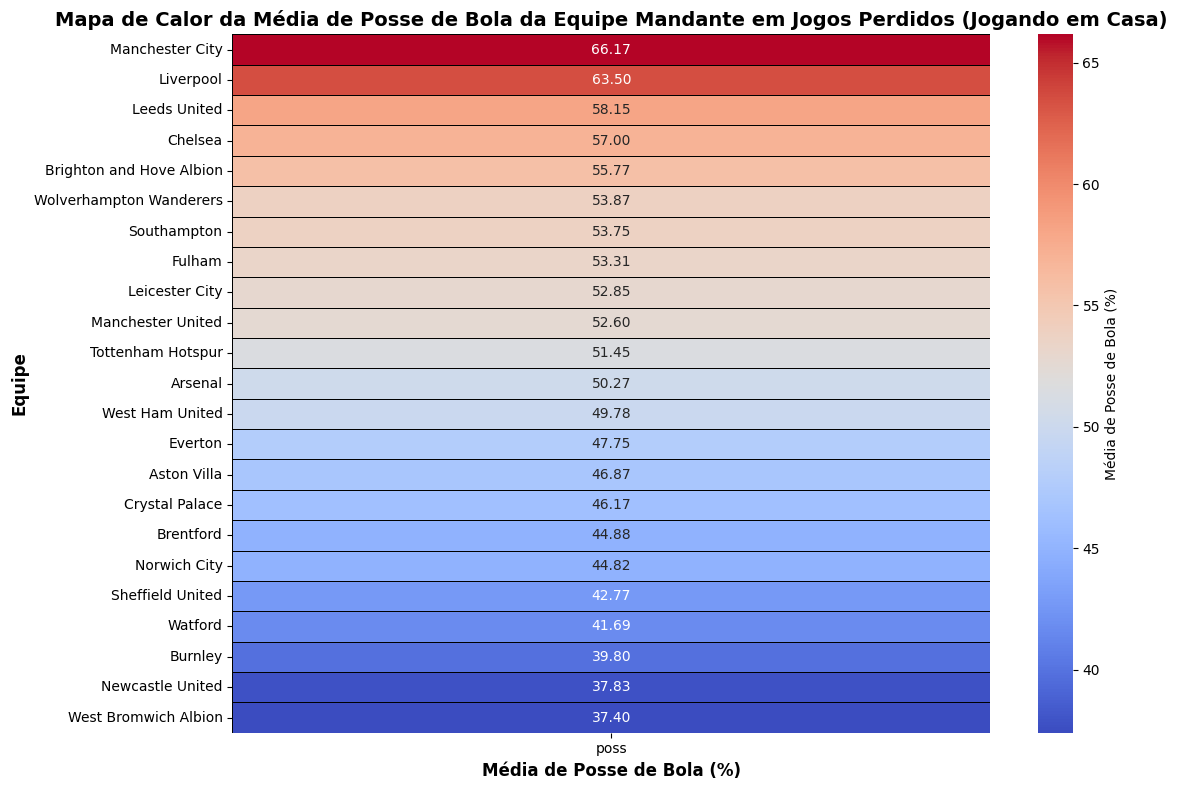

In [20]:
# Carregar o arquivo CSV
df = pd.read_csv('/content/sample_data/premier.csv')

# Filtrar os dados para partidas em que a equipe mandante perdeu e jogou em casa
lost_matches_home = df[(df['result'] == 'L') & (df['venue'] == 'Home')]

# Verificar se há partidas no DataFrame filtrado
if lost_matches_home.empty:
    print("Nenhuma partida perdida encontrada jogando em casa.")
else:
    # Verificar se há valores ausentes na coluna 'poss' e tratá-los
    if lost_matches_home['poss'].isnull().any():
        print(f"Há {lost_matches_home['poss'].isnull().sum()} valores ausentes em 'poss'. Estes valores serão removidos.")
        lost_matches_home = lost_matches_home.dropna(subset=['poss'])

    # Calcular a média de posse de bola para cada equipe
    average_possession = lost_matches_home.groupby('team')['poss'].mean().reset_index()

    # Verificar se o DataFrame tem dados válidos após o agrupamento
    if average_possession.empty:
        print("Nenhum dado válido após o agrupamento.")
    else:
        print("Dados do DataFrame após o agrupamento:")
        print(average_possession.head())

        # Ordenar os resultados por média de posse de bola
        average_possession = average_possession.sort_values(by='poss', ascending=False)

        # Criar uma matriz de dados para o heatmap
        heatmap_data = average_possession.set_index('team')

        # Criar o gráfico de mapa de calor
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black', cbar_kws={'label': 'Média de Posse de Bola (%)'})

        # Adicionar título e rótulos
        plt.title('Mapa de Calor da Média de Posse de Bola da Equipe Mandante em Jogos Perdidos (Jogando em Casa)', fontsize=14, fontweight='bold')
        plt.xlabel('Média de Posse de Bola (%)', fontsize=12, fontweight='bold')
        plt.ylabel('Equipe', fontsize=12, fontweight='bold')

        # Ajustar o layout e exibir o gráfico
        plt.tight_layout()
        plt.show()


## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [21]:
# Mapeamento dos resultados para os pontos correspondentes
mapeamento_result_4 = {
    'W': 3,
    'D': 1,
    'L': 0
}

# Aplicar o mapeamento na coluna 'result' para calcular os pontos
df['pontos'] = df['result'].replace(mapeamento_result_4)

# Verificar se a coluna de pontos foi calculada corretamente
print(df[['team', 'result', 'pontos']].head())  # Verificar os dados processados

# Agrupar os pontos por time e calcular a soma total de pontos
dados_soma = df.groupby('team')['pontos'].sum().reset_index()
dados_soma = dados_soma.rename(columns={'pontos': 'soma_pontos'})

# Ordenar os times com base na soma total de pontos
dados_soma = dados_soma.sort_values(by='soma_pontos', ascending=False)
dados_soma.reset_index(drop=True, inplace=True)

# Adicionar as URLs dos logos dos times
logo_urls = {
    'Watford': 'https://upload.wikimedia.org/wikipedia/pt/0/00/Watford_FC_Logo.png',
    'Norwich City': 'https://upload.wikimedia.org/wikipedia/pt/e/e2/Norwich_City_FC.png',
    'Everton': 'https://upload.wikimedia.org/wikipedia/pt/a/ae/Everton_FC_logo_2014.png',
    'Burnley': 'https://upload.wikimedia.org/wikipedia/pt/3/37/Burnley_F.C._logo.png',
    'Leeds United': 'https://upload.wikimedia.org/wikipedia/en/thumb/5/54/Leeds_United_F.C._logo.svg/1200px-Leeds_United_F.C._logo.svg.png',
    'Brentford': 'https://upload.wikimedia.org/wikipedia/pt/5/5a/Brentford_FC.png',
    'Aston Villa': 'https://upload.wikimedia.org/wikipedia/en/thumb/9/9a/Aston_Villa_FC_new_crest.svg/1200px-Aston_Villa_FC_new_crest.svg.png',
    'Southampton': 'https://upload.wikimedia.org/wikipedia/pt/thumb/5/54/Southampton_FC.svg/1200px-Southampton_FC.svg.png',
    'Wolverhampton Wanderers': 'https://upload.wikimedia.org/wikipedia/pt/6/6c/Wolverhampton_Wanderers.png',
    'Crystal Palace': 'https://upload.wikimedia.org/wikipedia/pt/c/c1/Crystal_Palace_FC_logo.png',
    'Brighton and Hove Albion': 'https://upload.wikimedia.org/wikipedia/en/d/d0/Brighton_and_Hove_Albion_FC_crest.svg',
    'Leicester City': 'https://upload.wikimedia.org/wikipedia/pt/0/0e/LeicesterCity_logo2014.png',
    'Newcastle United': 'https://upload.wikimedia.org/wikipedia/pt/2/25/Newcastle_United_Logo.png',
    'West Ham United': 'https://upload.wikimedia.org/wikipedia/en/thumb/c/c2/West_Ham_United_FC_logo.svg/1200px-West_Ham_United_FC_logo.svg.png',
    'Tottenham Hotspur': 'https://upload.wikimedia.org/wikipedia/pt/6/6d/Tottenham_Hotspur.png',
    'Arsenal': 'https://upload.wikimedia.org/wikipedia/pt/thumb/5/53/Arsenal_FC.svg/1200px-Arsenal_FC.svg.png',
    'Manchester United': 'https://upload.wikimedia.org/wikipedia/en/thumb/7/7a/Manchester_United_FC_crest.svg/640px-Manchester_United_FC_crest.svg.png',
    'Chelsea': 'https://upload.wikimedia.org/wikipedia/pt/thumb/c/cc/Chelsea_FC.svg/2048px-Chelsea_FC.svg.png',
    'Manchester City': 'https://upload.wikimedia.org/wikipedia/sco/thumb/e/eb/Manchester_City_FC_badge.svg/1024px-Manchester_City_FC_badge.svg.png',
    'West Bromwich Albion': 'https://upload.wikimedia.org/wikipedia/en/thumb/8/8b/West_Bromwich_Albion.svg/1200px-West_Bromwich_Albion.svg.png',
    'Sheffield United': 'https://upload.wikimedia.org/wikipedia/pt/4/49/Sheffield_United_FC.png',
    'Fulham': 'https://upload.wikimedia.org/wikipedia/pt/thumb/1/13/Fulham_FC.svg/1200px-Fulham_FC.svg.png',
    'Liverpool': 'https://upload.wikimedia.org/wikipedia/pt/thumb/0/0c/Liverpool_FC.svg/640px-Liverpool_FC.svg.png'
}

# Adicionar a coluna com os URLs dos logos
dados_soma['logo_url'] = dados_soma['team'].map(logo_urls)

# Calcular a colocação dos times
dados_soma['colocação'] = dados_soma['soma_pontos'].rank(ascending=False, method='min').astype(int)

# Imprimir os dados após o agrupamento e cálculo de pontos
print(dados_soma)

# Função para gerar a tabela em HTML com logos
def create_html_table(df):
    html = '<h2>Tabela de Pontos dos Times</h2>'
    html += '<table border="1" style="border-collapse: collapse; width: 50%;">'
    html += '<tr><th>Logo</th><th>Posição</th><th>Time</th><th>Pontos</th></tr>'

    for index, row in df.iterrows():
        html += f'<tr>'
        html += f'<td><img src="{row["logo_url"]}" width="50"></td>'
        html += f'<td>{row["colocação"]}</td>'
        html += f'<td>{row["team"]}</td>'
        html += f'<td>{row["soma_pontos"]}</td>'
        html += f'</tr>'

    html += '</table>'
    return html

# Gerar a tabela em HTML
html_table = create_html_table(dados_soma)

# Exibir a tabela em HTML
from IPython.display import display, HTML
display(HTML(html_table))

# Exibir o total de pontos de uma equipe específica, por exemplo, Tottenham Hotspur
tottenham_pontos = dados_soma[dados_soma['team'] == 'Tottenham Hotspur']['soma_pontos'].values[0]
print(f'Tottenham Hotspur: {tottenham_pontos} pontos')


              team result  pontos
0  Manchester City      L       0
1  Manchester City      W       3
2  Manchester City      W       3
3  Manchester City      W       3
4  Manchester City      D       1
                        team  soma_pontos  \
0            Manchester City          166   
1                    Chelsea          132   
2          Manchester United          128   
3                    Arsenal          121   
4          Tottenham Hotspur          120   
5            West Ham United          117   
6             Leicester City          108   
7    Wolverhampton Wanderers           94   
8               Leeds United           93   
9                Aston Villa           92   
10                   Everton           88   
11          Newcastle United           88   
12               Southampton           83   
13            Crystal Palace           82   
14  Brighton and Hove Albion           82   
15                   Burnley           70   
16                 Liverpool   

Logo,Posição,Time,Pontos
,1,Manchester City,166
,2,Chelsea,132
,3,Manchester United,128
,4,Arsenal,121
,5,Tottenham Hotspur,120
,6,West Ham United,117
,7,Leicester City,108
,8,Wolverhampton Wanderers,94
,9,Leeds United,93
,10,Aston Villa,92


Tottenham Hotspur: 120 pontos


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [22]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Carregar o arquivo CSV
df = pd.read_csv('/content/sample_data/premier.csv')

# Agrupar dados de público total por equipe
dados_publico_total = df.groupby('team')['attendance'].sum().reset_index()

# Configurar o app Dash
app = dash.Dash(__name__)

# Layout do aplicativo com gráfico inicial de público total e espaço para a tabela de detalhes
app.layout = html.Div([
    dcc.Graph(id='publico_total_graph'),
    html.Div(id='detalhamento_tabela')
])

# Callback para atualizar o gráfico de público total
@app.callback(
    Output('publico_total_graph', 'figure'),
    [Input('publico_total_graph', 'clickData')]
)
def update_total_publico(clickData):
    fig = px.bar(dados_publico_total, x='team', y='attendance',
                 title='Público Total por Equipe',
                 labels={'attendance': 'Público Total', 'team': 'Equipe'})

    return fig

# Callback para exibir tabela de detalhes (média, maior, menor público e resultado do jogo)
@app.callback(
    Output('detalhamento_tabela', 'children'),
    [Input('publico_total_graph', 'clickData')]
)
def update_detalhamento(clickData):
    if clickData:
        # Extrair a equipe clicada
        equipe = clickData['points'][0]['x']

        # Filtrar os dados da equipe
        jogos_equipe = df[df['team'] == equipe]

        # Calcular estatísticas
        media_publico = jogos_equipe['attendance'].mean()
        maior_publico = jogos_equipe['attendance'].max()
        menor_publico = jogos_equipe['attendance'].min()

        # Obter as linhas com o maior e menor público
        jogo_maior_publico = jogos_equipe[jogos_equipe['attendance'] == maior_publico]
        resultado_maior_publico = jogo_maior_publico['result'].values[0]

        jogo_menor_publico = jogos_equipe[jogos_equipe['attendance'] == menor_publico]
        resultado_menor_publico = jogo_menor_publico['result'].values[0]

        # Criar a tabela de detalhes
        tabela = html.Table([
            html.Thead(html.Tr([html.Th("Estatística"), html.Th("Valor")])),
            html.Tbody([
                html.Tr([html.Td("Equipe"), html.Td(equipe)]),
                html.Tr([html.Td("Média de Público"), html.Td(f"{media_publico:.2f}")]),
                html.Tr([html.Td("Maior Público"), html.Td(f"{maior_publico}")]),
                html.Tr([html.Td("Resultado no Jogo com Maior Público"), html.Td(resultado_maior_publico)]),
                html.Tr([html.Td("Menor Público"), html.Td(f"{menor_publico}")]),
                html.Tr([html.Td("Resultado no Jogo com Menor Público"), html.Td(resultado_menor_publico)])
            ])
        ])

        return html.Div([
            html.H3(f'Estatísticas de Público para {equipe}'),
            tabela
        ])

    else:
        # Mensagem inicial
        return html.Div([
            html.H3("Clique em uma equipe para ver as estatísticas de público")
        ])

# Rodar o app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>